## meloian_lab#5

### Task 1-2 

In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, CheckButtons
import numpy as np
from scipy.signal import butter, filtfilt  

In [2]:
# harmonic function without noise
def harmonic_signal(amplitude, frequency, phase, t):
    return amplitude * np.sin(2 * np.pi * frequency * t + phase) 

In [3]:
# generate noise separately
def generate_noise(noise_amplitude, noise_covariance, size):
    return noise_amplitude * np.random.normal(0, noise_covariance, size) 

In [4]:
# function to create a Butterworth filter and apply it
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y 

In [5]:
# initial parameters
initial_amplitude = 1.0
initial_frequency = 1.0
initial_phase = 0
initial_noise_amplitude = 0.5
initial_noise_covariance = 1
initial_cutoff_frequency = 2.0
initial_filter_order = 2
show_noise = True 

In [6]:
# creating the noise initially
t = np.linspace(0, 10, 1000)
noise = generate_noise(initial_noise_amplitude, initial_noise_covariance, t.shape) 

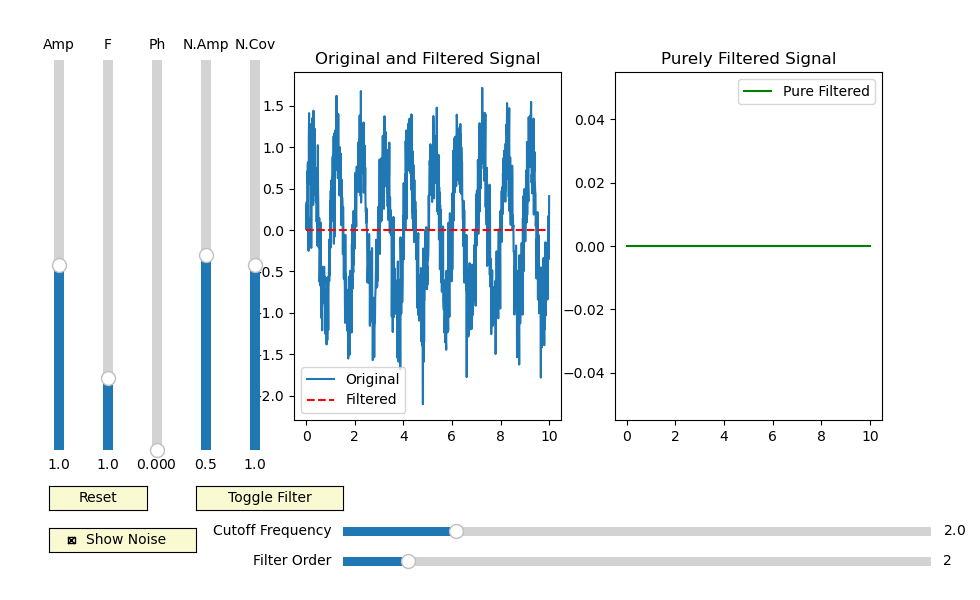

In [11]:
# create the figure and the axes for the plots and sliders
fig, axs = plt.subplots(1, 2, figsize=(9.8, 6))
plt.subplots_adjust(left=0.3, bottom=0.3)
axcolor = 'lightgoldenrodyellow'

# plotting the original and filtered signals
axs[0].set_title('Original and Filtered Signal')
original_line, = axs[0].plot(t, harmonic_signal(initial_amplitude, initial_frequency, initial_phase, t) + noise, label='Original')
filtered_line, = axs[0].plot(t, np.zeros_like(t), linestyle='--', color='red', label='Filtered')

# plotting the purely filtered signal
axs[1].set_title('Purely Filtered Signal')
pure_filtered_line, = axs[1].plot(t, np.zeros_like(t), color='green', label='Pure Filtered')

# scale factor for adjusting the amplitude of the Purely Filtered Signal
scale_factor = 0.022

# vertical sliders for harmonic parameters
ax_amplitude = plt.axes([0.05, 0.25, 0.02, 0.65], facecolor=axcolor)
ax_frequency = plt.axes([0.10, 0.25, 0.02, 0.65], facecolor=axcolor)
ax_phase = plt.axes([0.15, 0.25, 0.02, 0.65], facecolor=axcolor)
ax_noise_amp = plt.axes([0.20, 0.25, 0.02, 0.65], facecolor=axcolor)
ax_noise_cov = plt.axes([0.25, 0.25, 0.02, 0.65], facecolor=axcolor)

slider_amplitude = Slider(ax_amplitude, 'Amp', 0.1, 2.0, valinit=initial_amplitude, orientation='vertical')
slider_frequency = Slider(ax_frequency, 'F', 0.1, 5.0, valinit=initial_frequency, orientation='vertical')
slider_phase = Slider(ax_phase, 'Ph', 0, 2*np.pi, valinit=initial_phase, orientation='vertical')
slider_noise_amp = Slider(ax_noise_amp, 'N.Amp', 0.0, 1.0, valinit=initial_noise_amplitude, orientation='vertical')
slider_noise_cov = Slider(ax_noise_cov, 'N.Cov', 0.1, 2.0, valinit=initial_noise_covariance, orientation='vertical')

# horizontal sliders for filter parameters
ax_cutoff_freq = plt.axes([0.35, 0.1, 0.60, 0.03], facecolor=axcolor)
ax_filter_order = plt.axes([0.35, 0.05, 0.60, 0.03], facecolor=axcolor)

slider_cutoff_freq = Slider(ax_cutoff_freq, 'Cutoff Frequency', 0.1, 10.0, valinit=initial_cutoff_frequency)
slider_filter_order = Slider(ax_filter_order, 'Filter Order', 1, 10, valinit=initial_filter_order, valfmt='%0.0f')

# update function for sliders
def update(val):
    global noise, show_noise
    # generate new noise only if noise parameters are changed
    if val in [slider_noise_amp.val, slider_noise_cov.val]:
        noise = generate_noise(slider_noise_amp.val, slider_noise_cov.val, t.shape)
    
    signal = harmonic_signal(slider_amplitude.val, slider_frequency.val, slider_phase.val, t)
    combined_signal = signal + (noise if show_noise else 0)
    original_line.set_ydata(combined_signal)
    filtered_signal = butter_lowpass_filter(combined_signal, slider_cutoff_freq.val, 100, int(slider_filter_order.val))
    filtered_line.set_ydata(filtered_signal)
    pure_filtered_line.set_ydata(filtered_signal * scale_factor)   
    fig.canvas.draw_idle()

# reset button
resetax = plt.axes([0.05, 0.15, 0.1, 0.04])
reset_button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')
def reset(event):
    slider_amplitude.reset()
    slider_frequency.reset()
    slider_phase.reset()
    slider_noise_amp.reset()
    slider_noise_cov.reset()
    slider_cutoff_freq.reset()
    slider_filter_order.reset()
reset_button.on_clicked(reset)

# toggle Filter Visibility button
filter_button_ax = plt.axes([0.2, 0.15, 0.15, 0.04])
filter_button = Button(filter_button_ax, 'Toggle Filter', color=axcolor, hovercolor='0.975')
def toggle_filter_visibility(event):
    filtered_line.set_visible(not filtered_line.get_visible())
    pure_filtered_line.set_visible(not pure_filtered_line.get_visible())
    fig.canvas.draw_idle()
filter_button.on_clicked(toggle_filter_visibility)

# checkbox for toggling noise
check_ax = plt.axes([0.05, 0.08, 0.15, 0.04], facecolor=axcolor)
check = CheckButtons(check_ax, ['Show Noise'], [show_noise])
def toggle_noise(label):
    global show_noise
    show_noise = not show_noise
    update(None)
check.on_clicked(toggle_noise)

# connect the update function to sliders
slider_amplitude.on_changed(update)
slider_frequency.on_changed(update)
slider_phase.on_changed(update)
slider_noise_amp.on_changed(update)
slider_noise_cov.on_changed(update)
slider_cutoff_freq.on_changed(update)
slider_filter_order.on_changed(update)

# add legends to the plots
axs[0].legend()
axs[1].legend()

plt.show()  